## Import 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, Bidirectional, LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import bz2
import csv
import re

2025-09-15 06:23:39.886180: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757917420.090075      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757917420.152434      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading Datasets

In [2]:
import bz2

with bz2.BZ2File("/kaggle/input/amazonreviews/train.ft.txt.bz2") as f:
    training_data = [f.readline().decode('utf-8').strip() for _ in range(3000)]

with bz2.BZ2File("/kaggle/input/amazonreviews/test.ft.txt.bz2") as f:
    test_data = [f.readline().decode('utf-8').strip() for _ in range(1000)]

print("Training data subset size:", len(training_data))
print("Test data subset size:", len(test_data))

Training data subset size: 3000
Test data subset size: 1000


## Preparing Dataset

In [3]:
training_data[0]

'__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [4]:
training_labels = [int(re.findall(r'__label__(\d)', line)[0]) for line in training_data]
training_texts = [re.sub(r'__label__\d ', '', line) for line in training_data]

test_labels = [int(re.findall(r'__label__(\d)', line)[0]) for line in test_data]
test_texts = [re.sub(r'__label__\d ', '', line) for line in test_data]

# Convert labels to binary (0 and 1)
training_labels = [0 if label == 1 else 1 for label in training_labels]
test_labels = [0 if label == 1 else 1 for label in test_labels]

In [5]:
test_labels[:20]

[1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]

## Text Cleaning

In [6]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

def clean_text(text):
    """ Cleans text by lowercasing, removing stopwords, and applying stemming."""
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply function to training and test texts
training_texts = [clean_text(text) for text in training_texts]
test_texts = [clean_text(text) for text in test_texts]

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [7]:
training_texts[0]

'stune even nongam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen'

## Tokenization

In [9]:
# Tokenization and padding
max_words = 1000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(training_texts)

X_train = tokenizer.texts_to_sequences(training_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [10]:
X_train = np.array(X_train)
print(X_train.shape)
X_test = np.array(X_test)
print(X_test.shape)
y_train = np.array(training_labels)
print(y_train.shape)
y_test = np.array(test_labels)
print(y_test.shape)

(3000, 100)
(1000, 100)
(3000,)
(1000,)


## Training RNN

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-09-15 06:32:46.129892: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 850ms/step - accuracy: 0.4969 - loss: 0.9269 - val_accuracy: 0.4780 - val_loss: 0.7978
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 700ms/step - accuracy: 0.4958 - loss: 0.8696 - val_accuracy: 0.4910 - val_loss: 0.7710
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 684ms/step - accuracy: 0.5228 - loss: 0.8273 - val_accuracy: 0.4840 - val_loss: 0.7520
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 701ms/step - accuracy: 0.5369 - loss: 0.7973 - val_accuracy: 0.4780 - val_loss: 0.7380
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 683ms/step - accuracy: 0.5113 - loss: 0.7939 - val_accuracy: 0.4790 - val_loss: 0.7236
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 624ms/step - accuracy: 0.5155 - loss: 0.7696 - val_accuracy: 0.4850 - val_loss: 0.7159
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 657ms/step - accuracy: 0.4966 - loss: 0.7781 - val_accuracy: 0.4730 - val_loss: 0.7123
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 642ms/step - accuracy: 0.5069 - loss: 0.7582 - val_accuracy: 0.4820 - val_loss: 0.7102
Ep

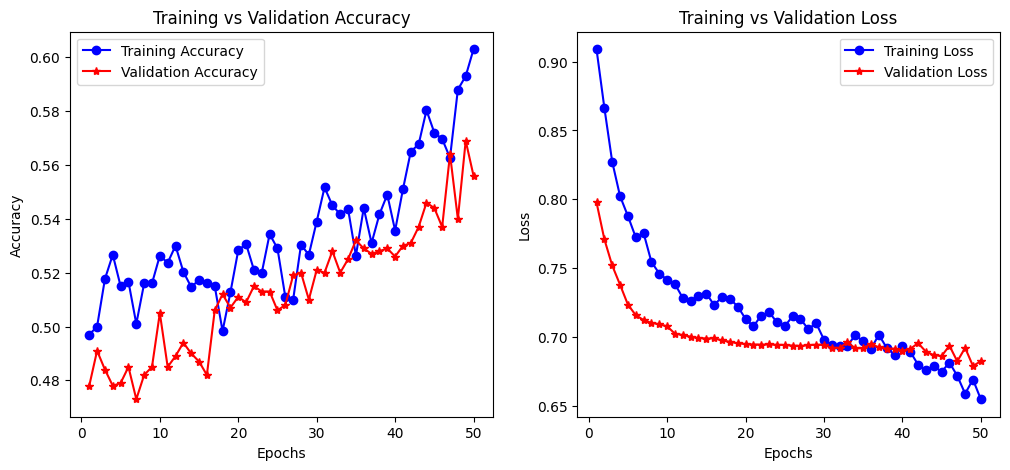

In [11]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length),
    SimpleRNN(128, return_sequences=True, dropout=0.3), 
    LayerNormalization(),  
    SimpleRNN(128, dropout=0.3),  
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),  
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

# Compile with a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [12]:
# Evaluating
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Confusion Matrix:
[[256 242]
 [189 313]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.51      0.54       498
           1       0.56      0.62      0.59       502

    accuracy                           0.57      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.57      0.57      0.57      1000



## Training LSTM

In [14]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length),
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2)),  
    LayerNormalization(), 
    Dropout(0.3),
    Bidirectional(LSTM(128, recurrent_dropout=0.2)),  
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),  
    Dropout(0.2),
    Dense(1, activation='sigmoid') 
])

# Compile with a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5314 - loss: 0.8214 - val_accuracy: 0.5180 - val_loss: 0.7095
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5042 - loss: 0.7801 - val_accuracy: 0.5420 - val_loss: 0.6911
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5405 - loss: 0.7370 - val_accuracy: 0.5360 - val_loss: 0.6895
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5546 - loss: 0.7101 - val_accuracy: 0.5780 - val_loss: 0.6761
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.5747 - loss: 0.6819 - val_accuracy: 0.5720 - val_loss: 0.6747
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5834 - loss: 0.6855 - val_accuracy: 0.5900 - val_loss: 0.6704
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5905 - loss: 0.6761 - val_accuracy: 0.6230 - val_loss: 0.6643
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.6254 - loss: 0.6510 - val_accuracy: 0.6320 - val_loss: 0.6592
Epoch 9/

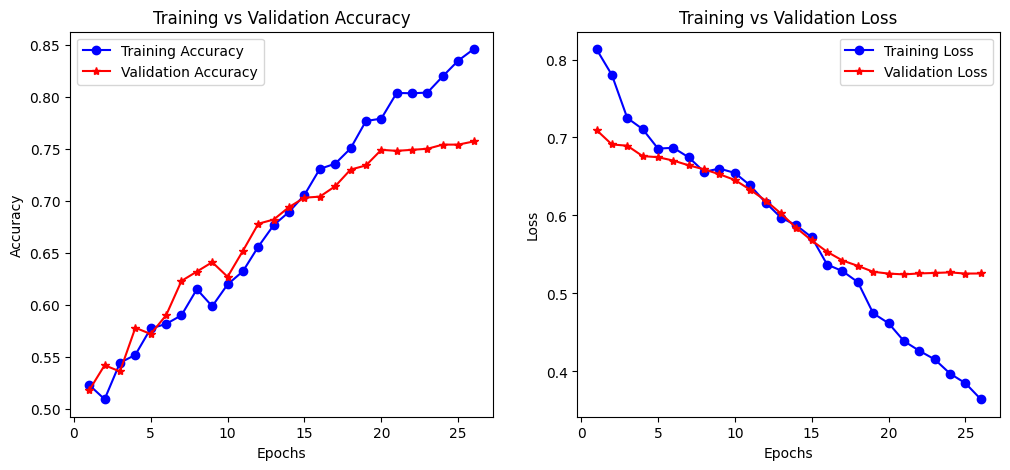

In [15]:
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [16]:
# Evaluating
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step
Confusion Matrix:
[[370 128]
 [124 378]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       498
           1       0.75      0.75      0.75       502

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



## Training GRU

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5126 - loss: 0.8930 - val_accuracy: 0.5190 - val_loss: 0.7843
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5264 - loss: 0.8359 - val_accuracy: 0.5230 - val_loss: 0.7542
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5170 - loss: 0.8348 - val_accuracy: 0.5210 - val_loss: 0.7383
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5306 - loss: 0.7911 - val_accuracy: 0.5350 - val_loss: 0.7274
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5429 - loss: 0.7821 - val_accuracy: 0.5570 - val_loss: 0.7171
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5610 - loss: 0.7516 - val_accuracy: 0.5690 - val_loss: 0.7077
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5600 - loss: 0.7564 - val_accuracy: 0.5770 - val_loss: 0.6994
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5709 - loss: 0.7328 - val_accuracy: 0.5850 - val_loss: 0.6921
Epoch 9/50
6/6

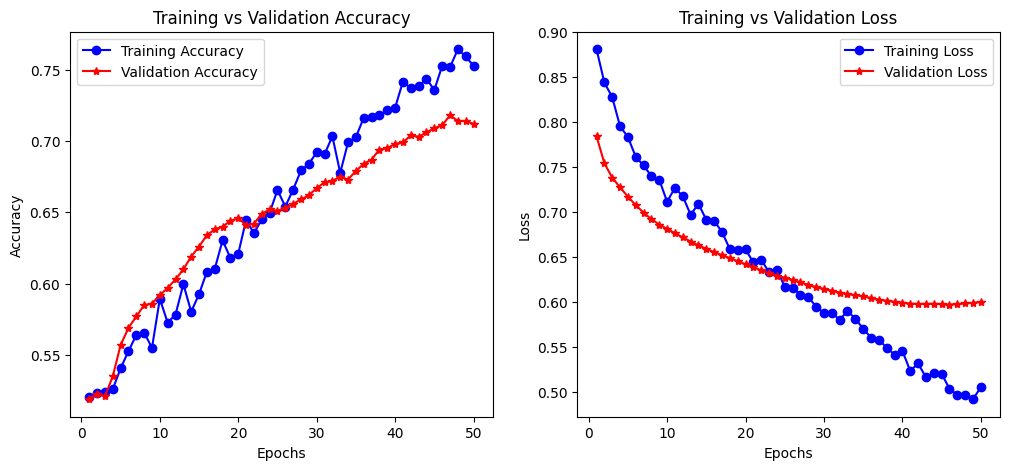

In [18]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=300, input_length=max_sequence_length),
    GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2), 
    LayerNormalization(), 
    GRU(128, dropout=0.3, recurrent_dropout=0.2), 
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),  
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

# Compile with a lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=5e-5), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Extract values from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [19]:
# Evaluating
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step
Confusion Matrix:
[[351 147]
 [142 360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       498
           1       0.71      0.72      0.71       502

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



## Detecting System

In [20]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(text, model, tokenizer, max_sequence_length=100):
    text = clean_text(text)
    # Convert text to sequence
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model.predict(padded_sequence)[0][0]  # Extract scalar value
    sentiment = "Positive 😊" if prediction > 0.5 else "Negative 😡"    
    return sentiment, float(prediction)

test_sentences = [
    "I love this product! It's amazing.",
    "This is the worst service I have ever experienced.",
    "The movie was okay, not great but not terrible either."
]

for sentence in test_sentences:
    sentiment, confidence = predict_sentiment(sentence, model, tokenizer)
    print(f"Text: {sentence}\nPredicted Sentiment: {sentiment} (Confidence: {confidence:.4f})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Text: I love this product! It's amazing.
Predicted Sentiment: Positive 😊 (Confidence: 0.9550)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Text: This is the worst service I have ever experienced.
Predicted Sentiment: Negative 😡 (Confidence: 0.4412)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Text: The movie was okay, not great but not terrible either.
Predicted Sentiment: Positive 😊 (Confidence: 0.9342)



In [22]:
model.save("lstm_model.h5")  
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)